Implements multivariate regression using gradient descent

blood fat = m1 * weight + m2 * age + b

In [76]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('https://raw.githubusercontent.com/bhagi8289/datasets/master/blood-fat_vs_age_and_weight.csv')
X = data.iloc[:, 0:2] # the last index should be 1 more than required i.e. 2 for index 0,1
y = data.iloc[:, 2]
data

,weight,age,fat
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451
5,69,25,302
6,63,28,288
7,72,36,385
8,79,57,402
9,75,44,365


In [77]:
print(X)
print(y)

    weight  age
0       84   46
1       73   20
2       65   52
3       70   30
4       76   57
5       69   25
6       63   28
7       72   36
8       79   57
9       75   44
10      27   24
11      89   31
12      65   52
13      57   23
14      59   60
15      69   48
16      60   34
17      79   51
18      75   50
19      82   34
20      59   46
21      67   23
22      85   37
23      55   40
24      63   30
0     354
1     190
2     405
3     263
4     451
5     302
6     288
7     385
8     402
9     365
10    209
11    290
12    346
13    254
14    395
15    434
16    220
17    374
18    308
19    220
20    311
21    181
22    274
23    303
24    244
Name: fat, dtype: int64


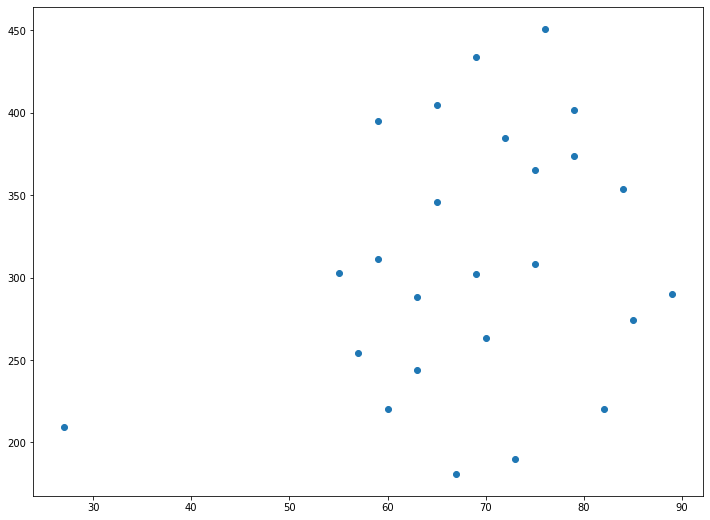

In [78]:
plt.scatter(X['weight'], y)
plt.show()

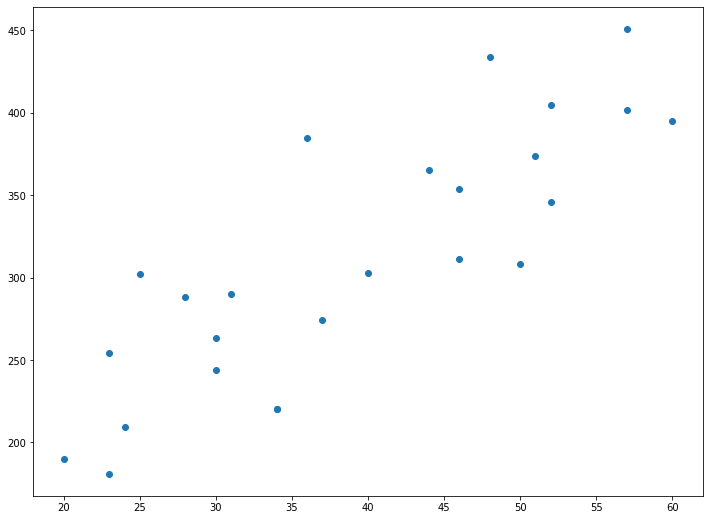

In [79]:
plt.scatter(X['age'], y)
plt.show()

Building the model

In [0]:
m1 = 0
m2 = 0
b = 0
L = 0.0001 #learning rate
epochs = 10000 # number of iterations to perform gradient descent
n = X.shape[0] # number of training examples. 25 

In [86]:
print(X.weight)

0     84
1     73
2     65
3     70
4     76
5     69
6     63
7     72
8     79
9     75
10    27
11    89
12    65
13    57
14    59
15    69
16    60
17    79
18    75
19    82
20    59
21    67
22    85
23    55
24    63
Name: weight, dtype: int64


Perform Gradient Descent

m1 = m1 - learning_rate * gradient of MSE wrt m1


m2 = m2 - learning_rate * gradient of MSE wrt m2


b = b - learning_rate * gradient of MSE wrt b


In [0]:
for i in range(epochs):
  y_pred = m1 * X.weight + m2 * X.age + b
  D_m1 = (-2/n) * sum(X.weight *(y-y_pred))
  D_m2 = (-2/n) * sum(X.age *(y-y_pred))
  D_b = (-2/n) * sum((y-y_pred))
  m1 = m1 - L*D_m1
  m2 = m2 - L*D_m2
  b = b - L*D_b



In [96]:
print(m1,m2,b)

1.255873522466102 5.573859997687891 4.332239561469347


Making Prediction

In [0]:
y_pred = m1 * X.weight + m2 * X.age + b

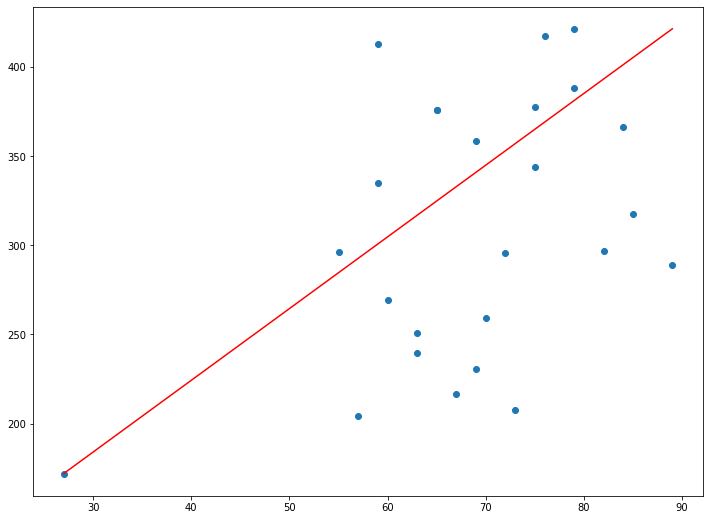

In [98]:
plt.scatter(X['weight'], y_pred)
plt.plot([min(X['weight']), max(X['weight'])], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

20 60 172.0134646125635 421.25626770450117


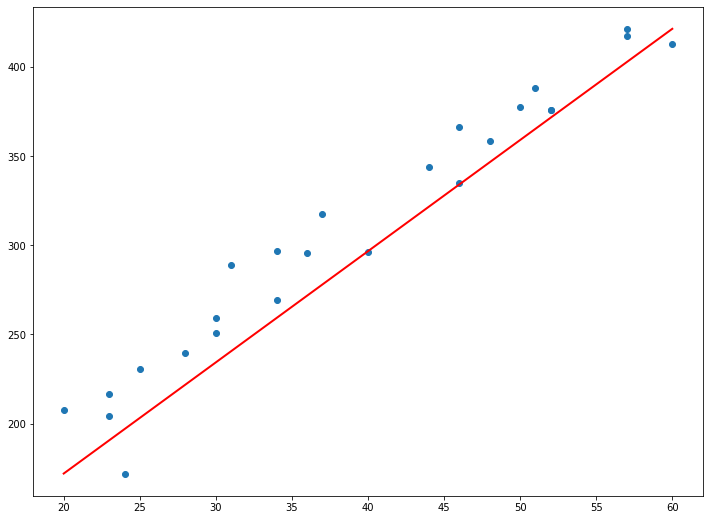

In [99]:
plt.scatter(X['age'], y_pred)
print(min(X['age']), max(X['age']), min(y_pred), max(y_pred))
plt.plot([min(X['age']), max(X['age'])], [min(y_pred), max(y_pred)], color='red',linewidth=2, markersize=12)  # regression line
plt.show()

Verify the coefficients from scikit-learn regression function

In [0]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
model = linear_reg.fit(X,y)

In [70]:
model.coef_

array([0.4173621 , 5.21659081])

In [71]:
model.intercept_

77.98253861487566

The above values are different as only age coefficient matches:

1.2997082918891625 

5.592536919465359 

0.48203099449180836

Check the predictions

In [74]:
predictions = model.predict(X)
predictions

array([353.00413212, 212.781788  , 376.37379709, 263.69560979,
       407.04773422, 237.19529365, 250.34089349, 295.82987884,
       408.29982052, 338.81469161, 214.44949469, 276.84208048,
       376.37379709, 221.75376685, 415.60235097, 357.17688225,
       280.38835204, 377.00027567, 370.11423646, 289.57031821,
       342.57007965, 225.92738784, 306.47217694, 309.6010864 ,
       260.7740751 ])

R2 value of the model is the percentage of explained variance of the predictions.

In [0]:
R2 = model.score(X,y)
print(R2)

In [0]:
y_pred - predictions

In [0]:
plt.scatter(X['weight'], predictions)
plt.plot([min(X['weight']), max(X['weight'])], [min(predictions), max(predictions)], color='red')  # regression line
plt.show()

In [0]:
plt.scatter(X['age'], predictions)
plt.plot([min(X['age']), max(X['age'])], [min(predictions), max(predictions)], color='red')  # regression line
plt.show()